In [8]:
import numpy as np
from qiskit import *
from qiskit import QuantumRegister
from qiskit import Aer, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
from math import pi
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import math

def SUM():
    qSum = QuantumRegister(3)
    qSum_circ = QuantumCircuit(qSum, name = 'SUM')
    qSum_circ.cx(qSum[1], qSum[2])
    qSum_circ.cx(qSum[0], qSum[2])
    return qSum_circ.to_instruction()

def CARRY():
    qCarry = QuantumRegister(4)
    qCarry_circ = QuantumCircuit(qCarry, name = 'CARRY')
    qCarry_circ.ccx(qCarry[1], qCarry[2], qCarry[3])
    qCarry_circ.cx(qCarry[1], qCarry[2])
    qCarry_circ.ccx(qCarry[0], qCarry[2], qCarry[3])
    return qCarry_circ.to_instruction()

def rCARRY():
    qrCarry = QuantumRegister(4)
    qrCarry_circ = QuantumCircuit(qrCarry, name = 'rCARRY')
    qrCarry_circ.ccx(qrCarry[0], qrCarry[2], qrCarry[3])    
    qrCarry_circ.cx(qrCarry[1], qrCarry[2])
    qrCarry_circ.ccx(qrCarry[1], qrCarry[2], qrCarry[3])
    return qrCarry_circ.to_instruction()
    
SUM = SUM()
CARRY = CARRY()
rCARRY = rCARRY()

In [9]:
A = QuantumRegister(3,'a')
B = QuantumRegister(4,'b')
C = QuantumRegister(3,'c')
creg = ClassicalRegister(4)
cir = QuantumCircuit(A,B,C,creg)
desired_vector = [0,0.1,0.17,0.25,math.sqrt(0.7972),0.25,0.17,0.1]
cir.initialize(desired_vector,[A[0],A[1],A[2]])
desired_vector2 = [0.17,0.25,math.sqrt(0.7972),0.25,0.17,0.1,0.1,0]
cir.initialize(desired_vector2,[B[0],B[1],B[2]])
for i in range(2):
    cir.append(CARRY, [C[i], A[i], B[i], C[i+1]]) 
cir.append(CARRY, [C[2], A[2], B[2], B[3]]) 
cir.cx(A[2], B[2])
for i in range(2):
    cir.append(SUM, [C[2-i], A[2-i], B[2-i]])
    cir.append(rCARRY, [C[1-i], A[1-i], B[1-i], C[2-i]])
cir.append(SUM, [C[0], A[0], B[0]])
cir.draw()

┌────────────────────────────────────────────────────┐┌────────┐»
 a_0: ┤0                                                   ├┤1       ├»
      │                                                    ││        │»
 a_1: ┤1 Initialize(0,0.1,0.17,0.25,0.89286,0.25,0.17,0.1) ├┤        ├»
      │                                                    ││        │»
 a_2: ┤2                                                   ├┤        ├»
      ├────────────────────────────────────────────────────┤│        │»
 b_0: ┤0                                                   ├┤2       ├»
      │                                                    ││        │»
 b_1: ┤1 Initialize(0.17,0.25,0.89286,0.25,0.17,0.1,0.1,0) ├┤  CARRY ├»
      │                                                    ││        │»
 b_2: ┤2                                                   ├┤        ├»
      └────────────────────────────────────────────────────┘│        │»
 b_3: ──────────────────────────────────────────────────────┤        ├»
                                                            │        │»
 c_0: ──────────────────────────────────────────────────────┤0       ├»
                                                            │        │»
 c_1: ──────────────────────────────────────────────────────┤3       ├»
                                                            └────────┘»
 c_2: ────────────────────────────────────────────────────────────────»
                                                                      »
c8: 4/════════════════════════════════════════════════════════════════»
                                                                      »
«                                                          ┌─────────┐┌──────┐
« a_0: ────────────────────────────────────────────────────┤1        ├┤1     ├
«      ┌────────┐                       ┌─────────┐┌──────┐│         ││      │
« a_1: ┤1       ├───────────────────────┤1        ├┤1     ├┤         ├┤      ├
«      │        │┌────────┐     ┌──────┐│         ││      ││         ││      │
« a_2: ┤        ├┤1       ├──■──┤1     ├┤         ├┤      ├┤         ├┤      ├
«      │        ││        │  │  │      ││         ││      ││         ││      │
« b_0: ┤        ├┤        ├──┼──┤      ├┤         ├┤      ├┤2        ├┤2     ├
«      │        ││        │  │  │      ││         ││      ││         ││  SUM │
« b_1: ┤2       ├┤        ├──┼──┤      ├┤2        ├┤2     ├┤  rCARRY ├┤      ├
«      │        ││        │┌─┴─┐│      ││         ││  SUM ││         ││      │
« b_2: ┤  CARRY ├┤2       ├┤ X ├┤2     ├┤  rCARRY ├┤      ├┤         ├┤      ├
«      │        ││  CARRY │└───┘│  SUM ││         ││      ││         ││      │
« b_3: ┤        ├┤3       ├─────┤      ├┤         ├┤      ├┤         ├┤      ├
«      │        ││        │     │      ││         ││      ││         ││      │
« c_0: ┤        ├┤        ├─────┤      ├┤         ├┤      ├┤0        ├┤0     ├
«      │        ││        │     │      ││         ││      ││         │└──────┘
« c_1: ┤0       ├┤        ├─────┤      ├┤0        ├┤0     ├┤3        ├────────
«      │        ││        │     │      ││         │└──────┘└─────────┘        
« c_2: ┤3       ├┤0       ├─────┤0     ├┤3        ├───────────────────────────
«      └────────┘└────────┘     └──────┘└─────────┘                           
«c8: 4/═══════════════════════════════════════════════════════════════════════
«

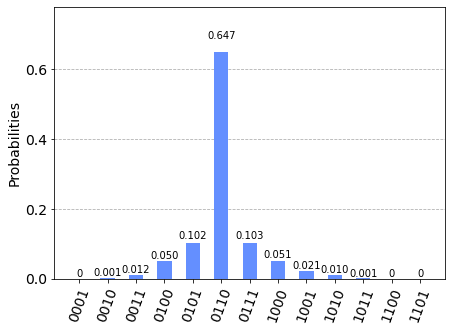

In [10]:
simulator = QasmSimulator()
cir.measure(B,creg)
cc = transpile(cir, simulator)
job = simulator.run(cc, shots=100000)
result = job.result()
counts = result.get_counts(cc)
plot_histogram(counts)